# STAT 207 Project 01 - What YouTube channel category is most subscribed to?

By Om Mistry (omist2), Ji-Eun Kim (jieunk3), and Gabe Chua (gchua2)

## 1. Introduction

***Goal:*** We are interested in YouTube channel categories that obtain the most number of subscribers. In this report, we are going to use Python to explore the relationship between subscriber count and YouTube channel category. 

***Motivation:*** Our analysis could be useful for people that are interested in starting a new YouTube channel to garner the most amount of subscribers. By finding which YouTube channel category has the most amount of subscribers on average, a user can choose to aim their content in that direction.

***Research Question:*** Is there a relationship between the Category of YouTube channels and the number of Subscribers that the YouTube channel has?

In [69]:
#Imports here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
df = pd.read_csv("Youtuber.csv")
df

,Rank,Channel Name,Category,Subscribers,Country,Average Views,Average Likes,Average Comments,Content Type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,T-Series,Music & Dance,258.4M,India,135.2K,5.6K,223,NaN
2,2.0,MrBeast,Video games,236.1M,United States,104M,4M,74K,Humor
3,3.0,Cocomelon - Nursery Rhymes,Education,171.4M,NaN,5.1M,57.1K,0,NaN
4,4.0,SET India,NaN,167.1M,India,27.9K,996,7,NaN
...,...,...,...,...,...,...,...,...,...
1041,996.0,BBC Earth,NaN,12.5M,United States,80.3K,1.7K,79,NaN
1042,997.0,Jamie Nyland,Animation,12.5M,United States,66.7K,2.5K,104,Humor
1043,998.0,janin al chair,NaN,12.5M,Mexico,1.4M,146.1K,485,NaN
1044,999.0,Myke Towers,Music & Dance,12.5M,Colombia,8.3K,485,8,NaN


## 2. Dataset Discussion

***Goal***: Our dataset is comprised of a diverse range of popular YouTube channels. Each channel has a wide variety of variables provided including name of the channel, average view count, etc. In our data analysis, we plan to mainly look at the subscriber count and channel category variables. Some limitations of this dataset might include the large number of missing values in the channel category column. This could be due to the fact that some channels are very unique and might be hard to identify.

***Source***: The source of our data comes from the following kaggle link: https://www.kaggle.com/datasets/shiivvvaam/top-youtuber-worldwide. We downloaded the dataset through the website and uploaded it into the project folder. A codebook is not available.

In [70]:
#Dataset:
df.head(7)

,Rank,Channel Name,Category,Subscribers,Country,Average Views,Average Likes,Average Comments,Content Type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,T-Series,Music & Dance,258.4M,India,135.2K,5.6K,223,NaN
2,2.0,MrBeast,Video games,236.1M,United States,104M,4M,74K,Humor
3,3.0,Cocomelon - Nursery Rhymes,Education,171.4M,NaN,5.1M,57.1K,0,NaN
4,4.0,SET India,NaN,167.1M,India,27.9K,996,7,NaN
5,5.0,✿ Kids Diana Show,Animation,118.5M,NaN,5.1M,14.3K,0,Toys
6,6.0,Like Nastya,Toys,112.6M,NaN,3.4M,45.9K,0,NaN


In [12]:
df.shape

(1046, 9)

***Unit of Observation***: The unit of observation here is the YouTube channel for which various statistics like subscribers, views, likes, and comments are being recorded.

***Type of Data:*** The dataset we are working with is a sample of top 1000 Youtube channels. It is not representative of the population of interest because the dataset only cover the top 1000 channels while there are almost over 50 million channels on YouTube. These channels are mostly popular and their statistics may not apply to someone starting off now on YouTube.

***Data Collection:*** The dataset was collected through web scraping from hypeauditor.com.

***Variables:*** In our analysis, we intend to explore the variables: Channel Name, Category, and Subscribers. The Channel Name describes the name of the YouTube channel and is an object type. Category is the genre or category the channel belongs to and is also an object type. And Subscribers refers to the numerical count of subscribers and is an object type.

***Think Critically:*** Some limitations include the number of missing values included in variables such as Category and Content Type. At the moment, only average views, likes, and comments are provided. Some information that we might want to add is the total count of views, likes, and comments of each channel. Something else that we might want to look at is what year the YouTube channel was made. Certain channel categories might have been more popular at different points in time.

## 3. Dataset Cleaning

***Goal:*** Our goal in this stage is to clean our dataset, which involves replacing missing values, evaluating uncommon values, and changing data types of certain variables. 

***Missing Values:*** Our data includes a total of 350 rows with missing values in the Category column. These values appear as NaN in our dataset and are automatically detected by Python. There are no other implicit missing values.

First, we decided to drop only one row which contained all missing values in all columns. Secondly, we replaced all missing values with 'Other' as dropping all missing values would cause almost 1/3 of our data to be removed. The advantages of treating the missing values in this way are keeping other relevant aspects of an observational unit and allowing for a greater number of units to perform analysis on. The drawbacks of treating the missing values in this manner would primarily be concerned with skewing the results since this new 'Other' category takes up a majority of the data.

***Uncommon Values:*** In terms of uncommon values, the first row contained information that was not available. Because it did not contain anything of importance, that row was dropped. We decided to drop one observation because it only contained NaN values. We do not believe removing this observation will greatly impact future analysis. 

***Other Data Cleaning:*** For the Subscribers column, the data was formatted in the object data type. There was an M next to each channel's subscriber count. This was removed to eventually turn the column from an object type to a float type.

1.) Removing the "M" from the Subscribers column, removing the first row, and turning the subscribers column from a object type to a float type.

In [71]:
df['Subscribers'] = df['Subscribers'].str[:-1]
df = df.iloc[1: , :]
df['Subscribers'] = df['Subscribers'].astype(float)
df

/var/folders/c9/fqjpyp_x2dbbmdx3jbn1pmd80000gn/T/ipykernel_51976/3490609937.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Subscribers'] = df['Subscribers'].astype(float)


,Rank,Channel Name,Category,Subscribers,Country,Average Views,Average Likes,Average Comments,Content Type
1,1.0,T-Series,Music & Dance,258.4,India,135.2K,5.6K,223,NaN
2,2.0,MrBeast,Video games,236.1,United States,104M,4M,74K,Humor
3,3.0,Cocomelon - Nursery Rhymes,Education,171.4,NaN,5.1M,57.1K,0,NaN
4,4.0,SET India,NaN,167.1,India,27.9K,996,7,NaN
5,5.0,✿ Kids Diana Show,Animation,118.5,NaN,5.1M,14.3K,0,Toys
...,...,...,...,...,...,...,...,...,...
1041,996.0,BBC Earth,NaN,12.5,United States,80.3K,1.7K,79,NaN
1042,997.0,Jamie Nyland,Animation,12.5,United States,66.7K,2.5K,104,Humor
1043,998.0,janin al chair,NaN,12.5,Mexico,1.4M,146.1K,485,NaN
1044,999.0,Myke Towers,Music & Dance,12.5,Colombia,8.3K,485,8,NaN


2.) Seeing how many NA values are in the Category column:

In [4]:
df["Category"].isna().sum()

350

3.) Turning all categories that are not available into an "Other" category.

In [72]:
df["Category"] = df["Category"].fillna("Other")
df

/var/folders/c9/fqjpyp_x2dbbmdx3jbn1pmd80000gn/T/ipykernel_51976/758187500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Category"] = df["Category"].fillna("Other")


,Rank,Channel Name,Category,Subscribers,Country,Average Views,Average Likes,Average Comments,Content Type
1,1.0,T-Series,Music & Dance,258.4,India,135.2K,5.6K,223,NaN
2,2.0,MrBeast,Video games,236.1,United States,104M,4M,74K,Humor
3,3.0,Cocomelon - Nursery Rhymes,Education,171.4,NaN,5.1M,57.1K,0,NaN
4,4.0,SET India,Other,167.1,India,27.9K,996,7,NaN
5,5.0,✿ Kids Diana Show,Animation,118.5,NaN,5.1M,14.3K,0,Toys
...,...,...,...,...,...,...,...,...,...
1041,996.0,BBC Earth,Other,12.5,United States,80.3K,1.7K,79,NaN
1042,997.0,Jamie Nyland,Animation,12.5,United States,66.7K,2.5K,104,Humor
1043,998.0,janin al chair,Other,12.5,Mexico,1.4M,146.1K,485,NaN
1044,999.0,Myke Towers,Music & Dance,12.5,Colombia,8.3K,485,8,NaN


4.) Seeing how many NA values are in the Category column:

In [73]:
df["Category"].isna().sum()

0

5.) First few observations of new cleaned up dataframe:

In [23]:
df.head()
df.dtypes

Rank                float64
Channel Name         object
Category             object
Subscribers         float64
Country              object
Average Views        object
Average Likes        object
Average Comments     object
Content Type         object
dtype: object

## 4. Summarizing Data

***Goal:*** We have decided to pick the Category variable as our categorical variable and Subscribers as our quantitative variable. Our purpose is to investigate the relationship between the Category of YouTube channels and the number of Subscribers that the YouTube channel has. Our research question is:

> *Is there a relationship between the Category of YouTube channels and the number of Subscribers that the YouTube channel has?*

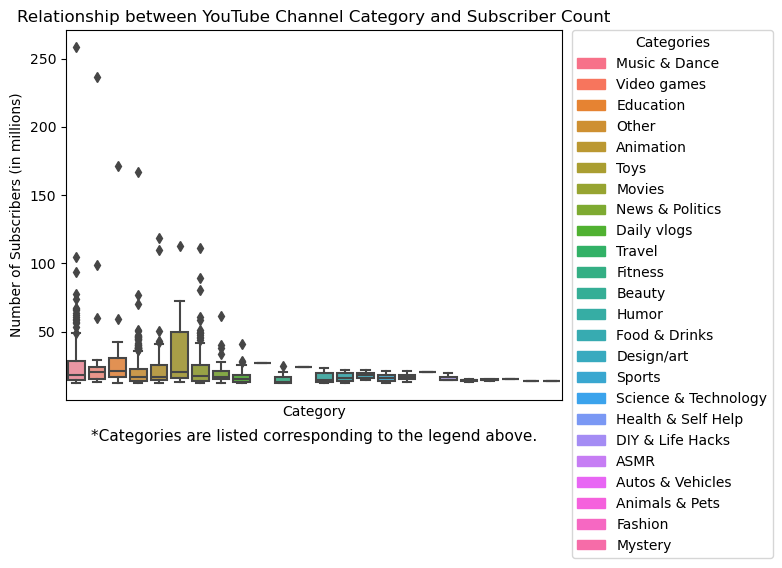

In [77]:
ax = sns.boxplot(x='Category', y='Subscribers', data=df)
plt.xlabel("Category")
plt.ylabel('Number of Subscribers (in millions)')
categories = df['Category'].unique()
palette = sns.color_palette("husl", len(categories))
legend_handles = [mpatches.Patch(color=palette[i], label=f'{categories[i]}') for i in range(len(categories))]

plt.legend(handles=legend_handles, title='Categories', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

ax.set_xticks([])

plt.text(0.5, -0.1, "*Categories are listed corresponding to the legend above.",
         ha='center', va='center', transform=ax.transAxes, fontsize=11, color='black')

plt.title('Relationship between YouTube Channel Category and Subscriber Count')
plt.show()

In [55]:
num_summary = df[['Category', 'Subscribers']].groupby('Category').describe()
num_summary

Subscribers                                             \
                           count       mean        std   min     25%    50%   
Category                                                                      
ASMR                         2.0  14.550000   1.484924  13.5  14.025  14.55   
Animals & Pets               1.0  15.400000        NaN  15.4  15.400  15.40   
Animation                  133.0  21.972932  14.080085  12.5  14.500  17.00   
Autos & Vehicles             2.0  14.900000   0.989949  14.2  14.550  14.90   
Beauty                       1.0  23.900000        NaN  23.9  23.900  23.90   
DIY & Life Hacks             3.0  16.233333   2.829016  14.6  14.600  14.60   
Daily vlogs                 37.0  17.572973   6.044954  12.6  13.400  15.80   
Design/art                   2.0  18.250000   5.161880  14.6  16.425  18.25   
Education                   21.0  30.390476  34.146887  12.6  17.100  21.40   
Fashion                      1.0  14.100000        NaN  14.1  14.100  14.10   
Fitness                      7.0  15.800000   4.974602  12.6  12.850  13.10   
Food & Drinks               12.0  16.833333   3.511885  12.6  14.050  16.10   
Health & Self Help           1.0  20.500000        NaN  20.5  20.500  20.50   
Humor                       13.0  16.361538   3.902038  12.5  13.300  14.60   
Movies                     157.0  22.618471  14.557626  12.6  14.000  17.40   
Music & Dance              210.0  25.432857  22.127735  12.5  14.800  18.70   
Mystery                      1.0  13.800000        NaN  13.8  13.800  13.80   
News & Politics             31.0  20.748387  10.380394  12.8  15.700  16.80   
Other                      350.0  20.742286  12.201641  12.5  13.900  16.60   
Science & Technology         8.0  17.012500   2.718423  13.1  15.225  16.95   
Sports                       8.0  16.312500   3.266032  12.6  13.875  15.95   
Toys                        14.0  36.292857  30.042239  13.6  16.325  20.50   
Travel                       1.0  27.300000        NaN  27.3  27.300  27.30   
Video games                 29.0  31.303448  42.827532  13.5  15.400  20.70   

                                     
                         75%    max  
Category                             
ASMR                  15.075   15.6  
Animals & Pets        15.400   15.4  
Animation             25.500  118.5  
Autos & Vehicles      15.250   15.6  
Beauty                23.900   23.9  
DIY & Life Hacks      17.050   19.5  
Daily vlogs           18.500   40.7  
Design/art            20.075   21.9  
Education             30.700  171.4  
Fashion               14.100   14.1  
Fitness               17.050   25.1  
Food & Drinks         20.200   22.0  
Health & Self Help    20.500   20.5  
Humor                 20.000   23.2  
Movies                25.900  111.6  
Music & Dance         28.500  258.4  
Mystery               13.800   13.8  
News & Politics       21.350   61.9  
Other                 22.875  167.1  
Science & Technology  18.675   21.1  
Sports                18.200   21.3  
Toys                  49.825  112.6  
Travel                27.300   27.3  
Video games           24.300  236.1

We decide to use both numerical summaries and a boxplot to visualize our data. In our numerical summary, each category has its count, mean, std, min, IQR, and max. Looking at the boxplot, the first ten categories have a large number of outliers. Because there seems to be a lot of outliers in our data among all categories, we opt to mainly look at the median amount of subscribers. The median values for the majority of the categories are relatively similar around 20 million. Nearly half of the box plots have a positively skewed distribution with the other half of the box plots having a more symmetrical distribution. 



The first few categories that had the highest median value of subscribers were (1) Travel, (2) Beauty, (3) Video games, (4) Health & Self Help, and (5) Toys. 

Looking at the results of our summaries and graphs, there is not a strong relationship between 'subscriber' and 'category'. Although there are some categories with a greater amount of outliers, most of the boxplots have around the same median value and similar IQR's. 

Based on our analysis, we can conclude that there is a lack of a relationship between the Category of YouTube channels and the number of Subscribers that a YouTube channel has.

## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes on their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

## 5. Conclusion

***Summarization:*** The dataset we chose to work around with and analyze was of the Top YouTubers worldwide (Top 1000) from Kaggle. This dataset is comprised of a diverse range of popular YouTube channels. Each channel has various variables, including the channel's name, subscribers, average view count, etc. Before analyzing, a few data cleaning measures were taken care of: first, we decided to drop the row that contained all missing values in all columns. Secondly, we replaced all missing values (NaN) in the ‘Category’ column with 'Other' as dropping all missing values would cause almost 1/3 of our data to be removed. Finally, we changed the subscribers column from an object type to a float type. These measures allow us to analyze and draw conclusions around our research question: Is there a relationship between the Category of YouTube channels and the number of Subscribers that the YouTube channel has?

***Limitations:*** While conducting analysis, the team faced some limitations with the number of missing values in the Category variable. These missing values can skew the results we obtain. Something else that we might want to look at is what year the YouTube channel was made, and the number of video content they created to reach their first 10,000 subscribers. This information can allow us to categorize channels more effectively for the viewers as certain channel categories might have been more popular at different points in time. This contextual information along with the results we obtained through our analysis can be used by an aspiring YouTube content creator to strategize and position their channel category to increase their odds of growing faster on YouTube. 

***Future Work:*** For future research to be conducted on these analyses, a question worth investigating is whether the frequency with which each channel category influences the YouTube algorithms in a way that drives more engagement for that particular YouTube channel. This would require additional information on the channel’s frequency of uploading material every week/month for a particular set of periods, which could be compared with their respective channel matrics for that particular time frame. This future research can help aspiring YouTubers plan strategically and optimize their channel for the highest amount of engagement.